In [271]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp

%matplotlib inline

# Loading csv file
df = pd.read_csv("PittsburghArrestData.csv")

# Dropping unnecessary columns
df.drop(['INCIDENTZONE','INCIDENTTRACT', 'COUNCIL_DISTRICT', 'X', 'Y', 'PUBLIC_WORKS_DIVISION',], axis=1, inplace=True)


# Formatting arrest time properly
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])


df.tail(3)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD
51596,2042244,21154979,30.0,M,B,2021-11-09 11:00:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 2706 Terroristic Threat...,"200 Block N Fairmount ST Pittsburgh, PA 15206",Garfield
51597,2042245,21156752,31.0,M,B,2021-11-09 08:58:00,"600 Block Fort Duquesne BL Pittsburgh, PA 15222",9015 Failure To Appear/Arrest on Attachment Order,"200 Block E Elizabeth ST Pittsburgh, PA 15207",Hazelwood
51598,2042246,21162908,55.0,M,B,2021-11-04 15:00:00,"600 Block 1st AV Pittsburgh, PA 15219",2705 Recklessy Endangering Another Person. / 6...,"1300 Block Complete ST Pittsburgh, PA 15212",Marshall-Shadeland


In [240]:
# What neighboorhood has the most arrests?

dict = {}


#df = df.head(10)
hood = df['INCIDENTNEIGHBORHOOD']


for value in hood.iteritems():
    neighborhood = str(value[1])
    if not neighborhood in dict:
        dict[neighborhood] = 1
    else:
        dict[neighborhood] += 1
        
# Make a DataFrame that holds columns: Neighborhood, Arrest amount


hood_df = pd.DataFrame(list(dict.items()), columns=['Neighborhood', 'ArrestAmount'])

# Dropping row that is nan
hood_df.drop(9, inplace=True)

print("Place with least amount of arrests: ",hood_df.min())


df_filtered = hood_df[hood_df['ArrestAmount'] >= 100]
print(df_filtered.shape)
df_filtered

Place with least amount of arrests:  Neighborhood    Allegheny Center
ArrestAmount                   2
dtype: object
(79, 2)


,Neighborhood,ArrestAmount
0,Bloomfield,793
1,Outside City,249
2,Westwood,174
3,East Allegheny,1709
4,Crafton Heights,450
...,...,...
86,Troy Hill,337
87,Central Business District,3160
88,Central North Side,689
89,Mount Oliver,107


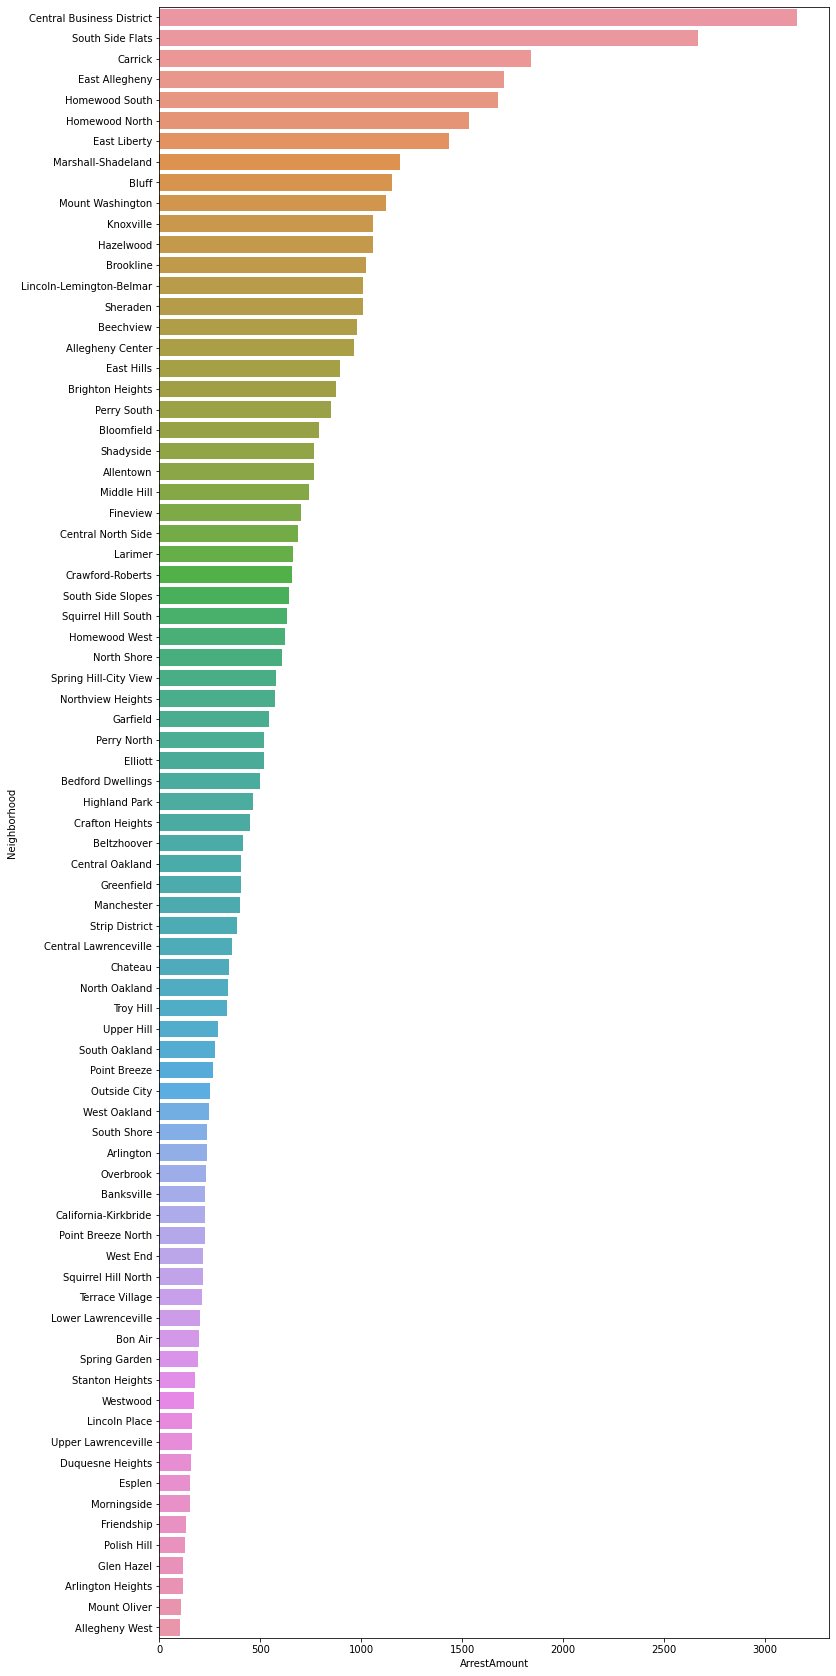

In [272]:
fig_dims = (12, 30)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "ArrestAmount", 
            y = "Neighborhood", 
            ax=ax, 
            data=hood_df, 
            orient="h", 
            order=df_filtered.sort_values('ArrestAmount', ascending = False).Neighborhood)

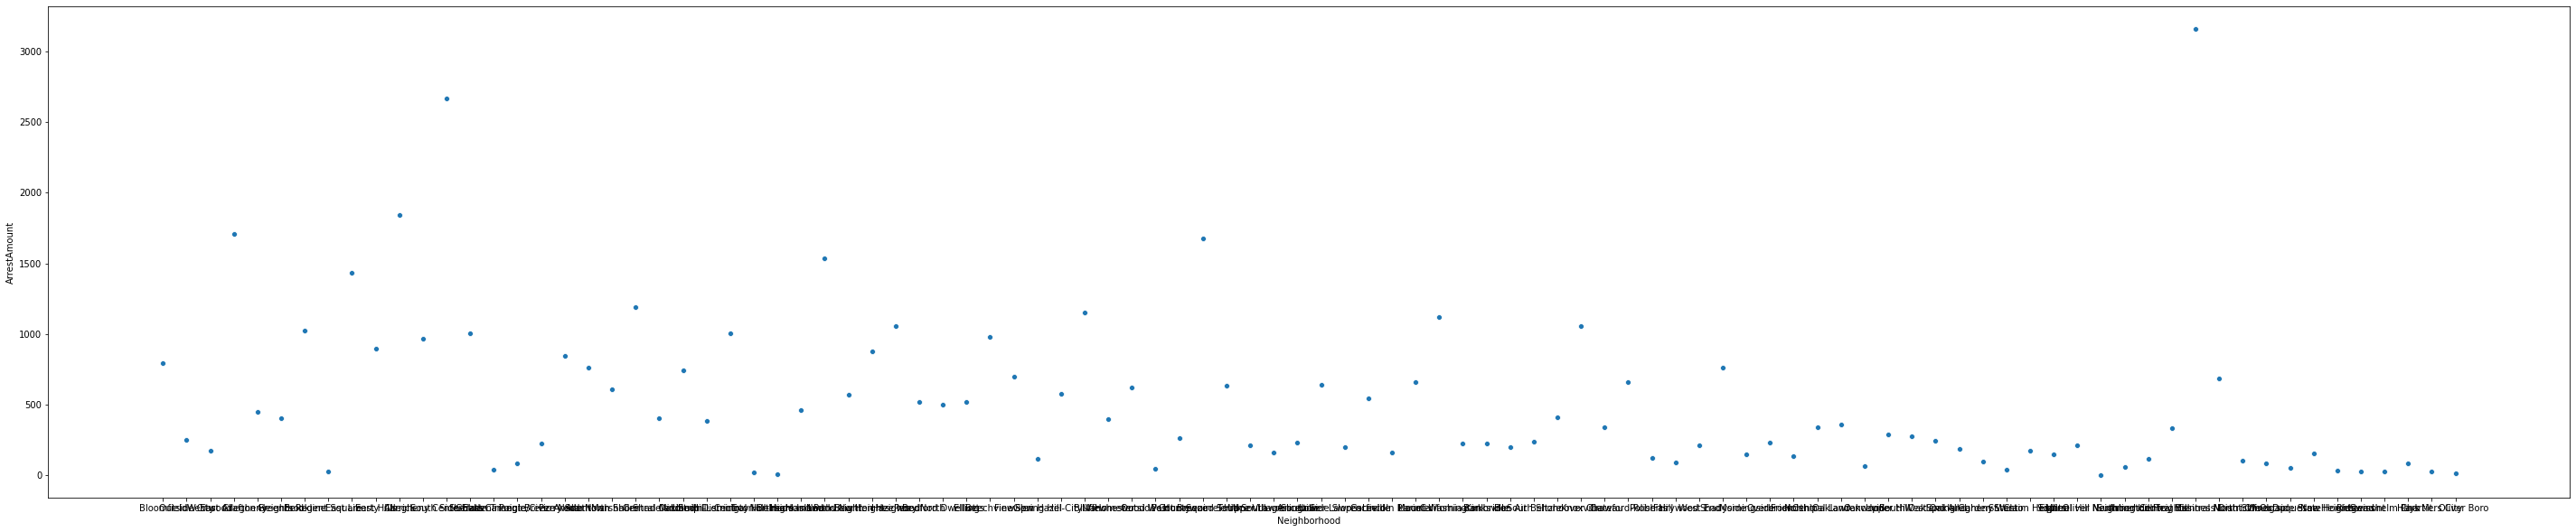

In [270]:
fig_dims = (50, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = "Neighborhood", y = "ArrestAmount", ax=ax, data=hood_df)

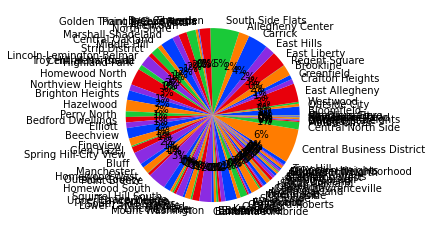

In [263]:
# Making a pie chart that shows neighborhoods and arrests


import matplotlib.pyplot as plt
import seaborn as sns


place = hood_df['Neighborhood']
arrests = hood_df['ArrestAmount']

labels = []
arrest_data = []


for item in place.iteritems():
    labels.append(item[1])
for item in arrests.iteritems():
    arrest_data.append(item[1])

# define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

# create pie chart
plt.pie(arrest_data, labels = labels , colors = colors, autopct='%.0f%%')

plt.show()